In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams.update({'font.size': 14})
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
x_axis = [1, 2, 4, 8, 12, 26, 36, 48, 64]
n_tasks = 1024

ms1_processes = [1069.164, 538.23, 276.105, 150.461, 112.637, 101.474, 127.279, 193.309, 261.227]
ms1_subinterpreters = [1071.031, 553.797, 299.308, 184.349, 153.798, 164.262, 191.615, 235.297, 296.091]
ms1_sequential = n_tasks

ms5_processes = [5167.067, 2586.652, 1300.143, 663.575, 457.93, 254.031, 235.977, 245.867, 309.85]
ms5_subinterpreters = [5169.151, 2605.507, 1334.787, 697.729, 498.605, 321.112, 299.623, 317.375, 360.027]
ms5_sequential = 5*n_tasks

ms50_processes = [51261.275, 25632.076, 12825.991, 6423.739, 4321.159, 2055.407, 1530.022, 1219.81, 1002.095]
ms50_subinterpreters = [51252.803, 25647.669, 12847.717, 6462.909, 4367.318, 2109.714, 1616.25, 1304.495, 1086.843]
ms50_sequential = 50*n_tasks

In [3]:
colors = ["#A0D2DB", "#188FA7", "#0F5C6B", "#F25A02"]
linewidth = 2
style = '--'
xticks = [1]
databytes = 10
for i in range(5, x_axis[-1], 5):
    xticks.append(i)

def plot(ms, proc, subints):
    target = [(ms * n_tasks)/i for i in x_axis]
    if xticks[-1] != x_axis[-1]:
        xticks.append(x_axis[-1])
    fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
    plt.plot(x_axis, proc, '-', label="FastFlow's Processes", linewidth=linewidth, color=colors[2])[0].set_dash_capstyle('round')
    plt.plot(x_axis, subints, '-', label="FastFlow's Subinterpreters", linewidth=linewidth, color=colors[3])[0].set_dash_capstyle('round')
    plt.plot(x_axis, target, ls="dotted", label="Ideal", linewidth=linewidth, color="black")[0].set_dash_capstyle('round')

    axs.set_xlabel("Number of workers")
    axs.set_ylabel("Time (seconds)")
    # Setting the number of ticks
    #axs.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.xticks(xticks, labels=xticks)
    #axs.yaxis.set_major_locator(ticker.MultipleLocator(2))
    axs.yaxis.set_major_formatter(ticker.ScalarFormatter())
    axs.yaxis.set_minor_formatter(ticker.ScalarFormatter())
    axs.tick_params(which='minor', length=0)

    plt.title('Time over number of workers', fontweight="bold", y=1.05)
    plt.legend()
    plt.yscale('log')
    #plt.savefig("with-numpy", bbox_inches="tight")
    plt.show()

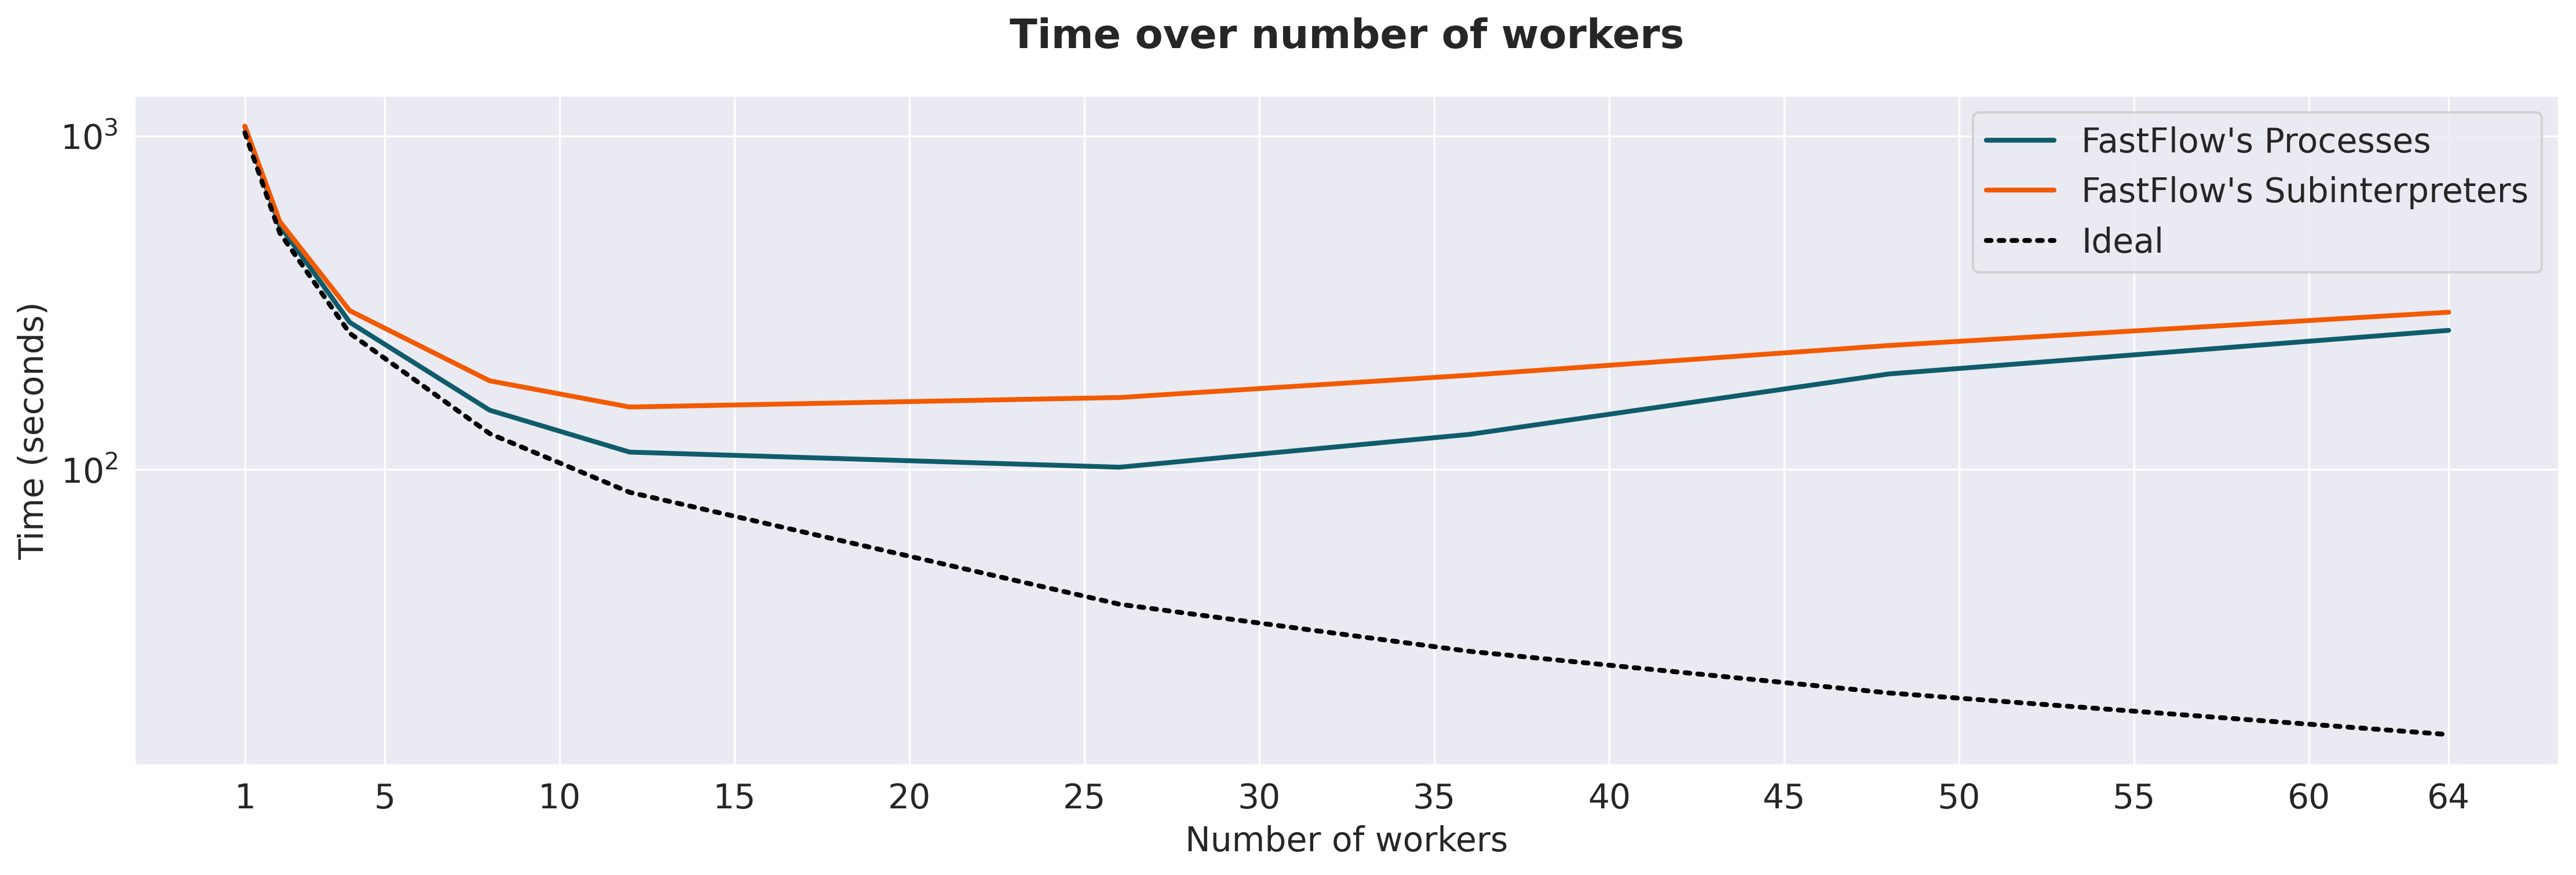

In [4]:
plot(1, ms1_processes, ms1_subinterpreters)

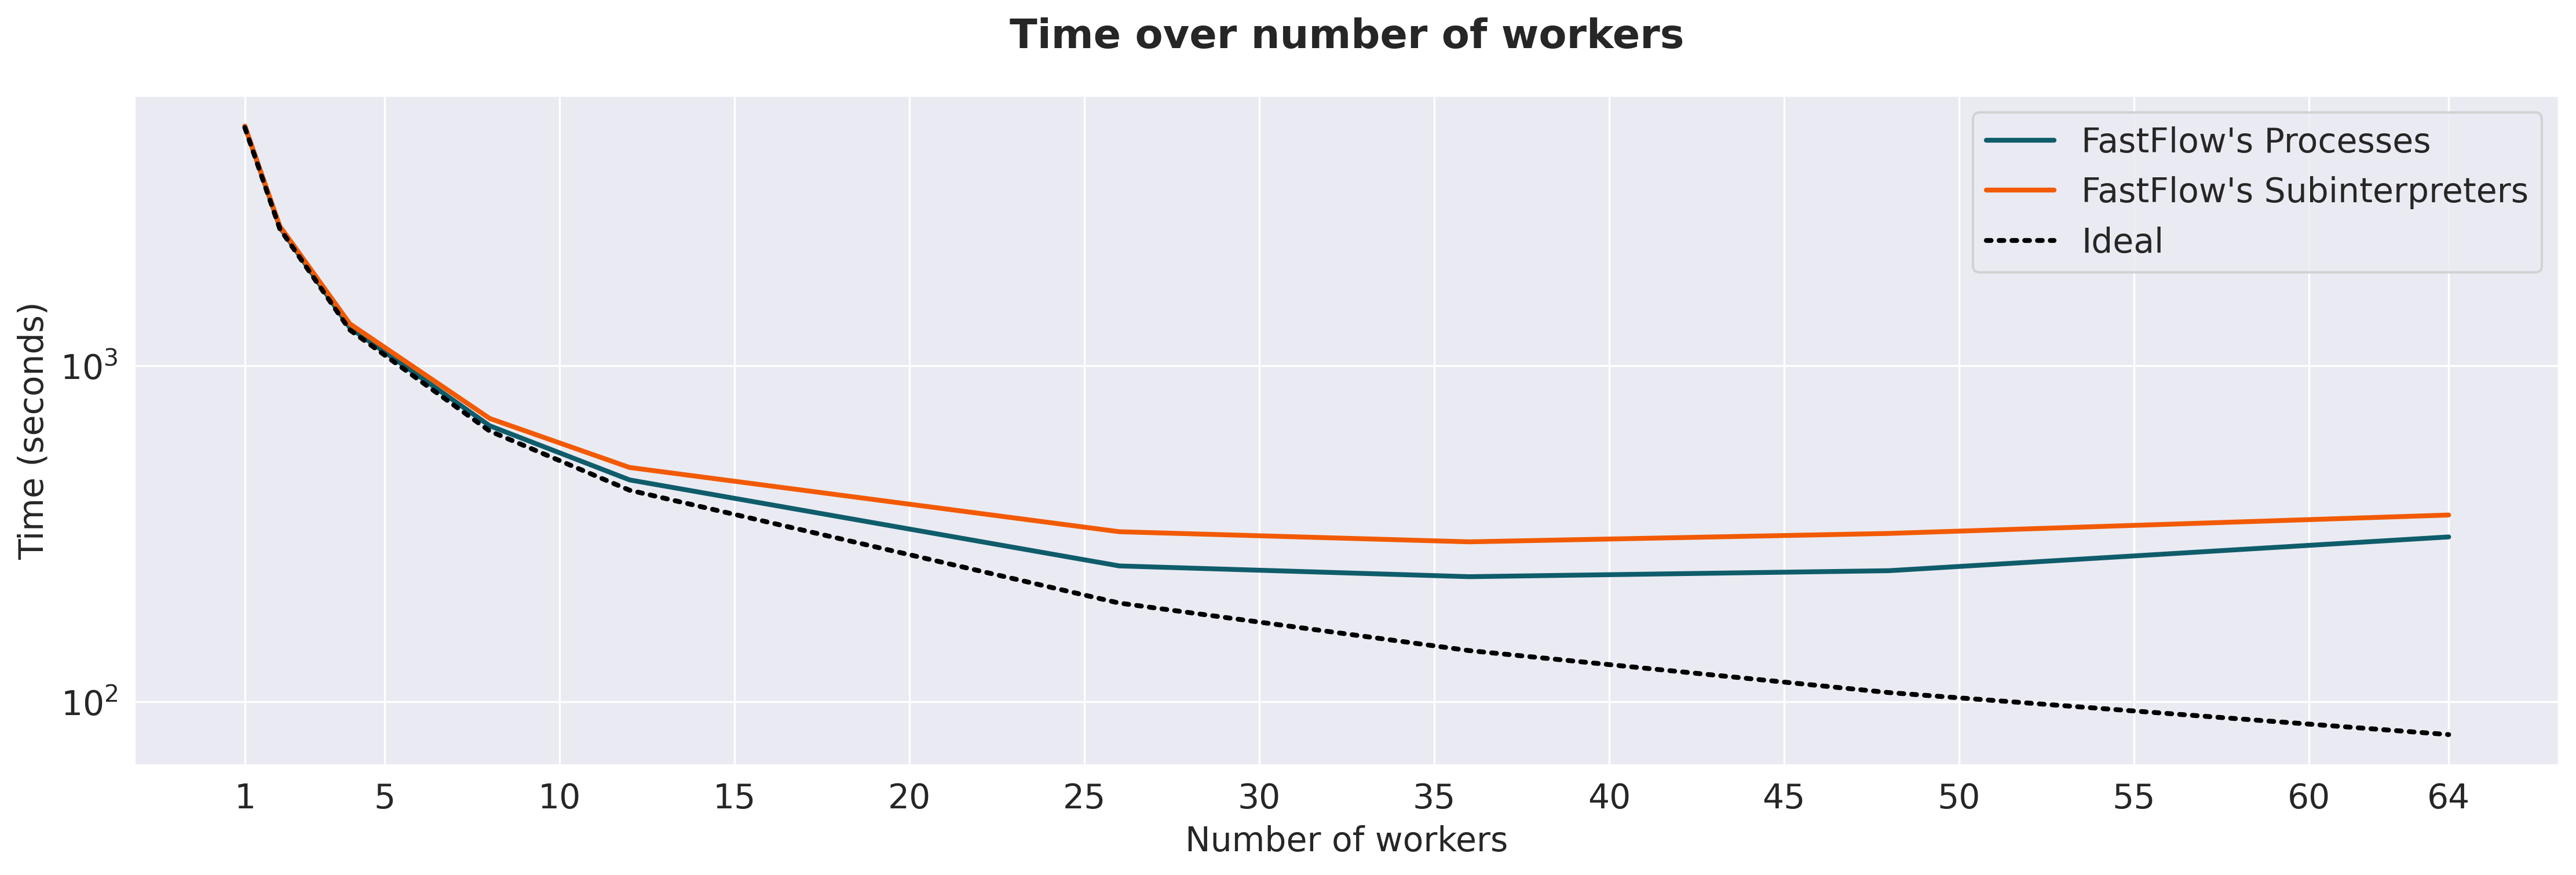

In [5]:
plot(5, ms5_processes, ms5_subinterpreters)

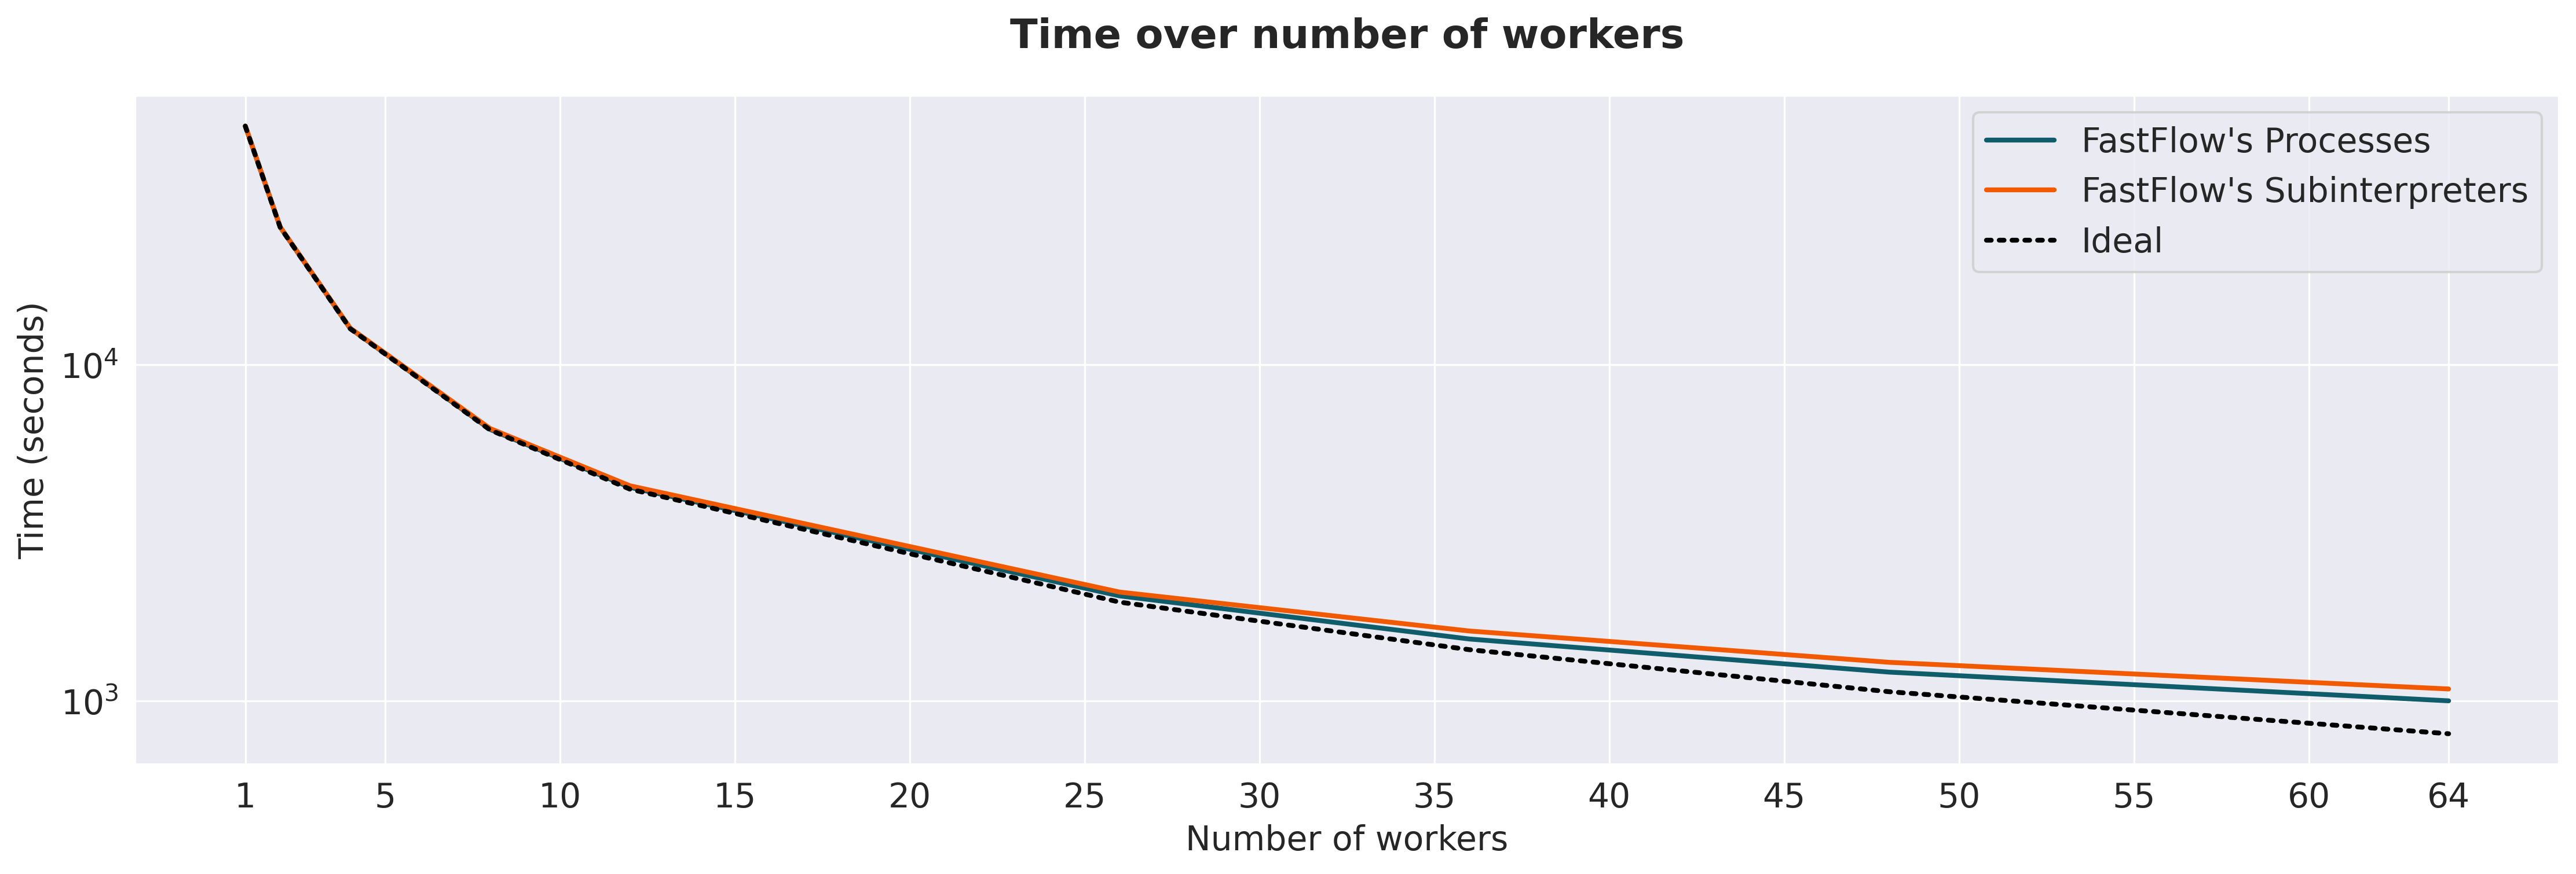

In [6]:
plot(50, ms50_processes, ms50_subinterpreters)

In [7]:
def plot_scalability(proc, subints):
    if xticks[-1] != x_axis[-1]:
        xticks.append(x_axis[-1])
    fig, axs = plt.subplots(figsize=(18, 5), dpi=300)
    plt.plot(x_axis, [proc[0]/val for val in proc], '-', label="FastFlow's Processes", linewidth=linewidth, color=colors[2])[0].set_dash_capstyle('round')
    plt.plot(x_axis, [subints[0]/val for val in subints], '-', label="FastFlow's Subinterpreters", linewidth=linewidth, color=colors[3])[0].set_dash_capstyle('round')
    plt.plot(x_axis, [nw for nw in x_axis], ls="dotted", label="Ideal", linewidth=linewidth, color="black")[0].set_dash_capstyle('round')

    axs.set_xlabel("Number of workers")
    axs.set_ylabel("Scalability")
    # Setting the number of ticks
    #axs.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.xticks(xticks, labels=xticks)
    #axs.yaxis.set_major_locator(ticker.MultipleLocator(2))
    axs.yaxis.set_major_formatter(ticker.ScalarFormatter())
    axs.yaxis.set_minor_formatter(ticker.ScalarFormatter())
    axs.tick_params(which='minor', length=0)

    plt.title('Scalability', fontweight="bold", y=1.05)
    plt.legend()
    #plt.savefig("with-numpy", bbox_inches="tight")
    plt.show()

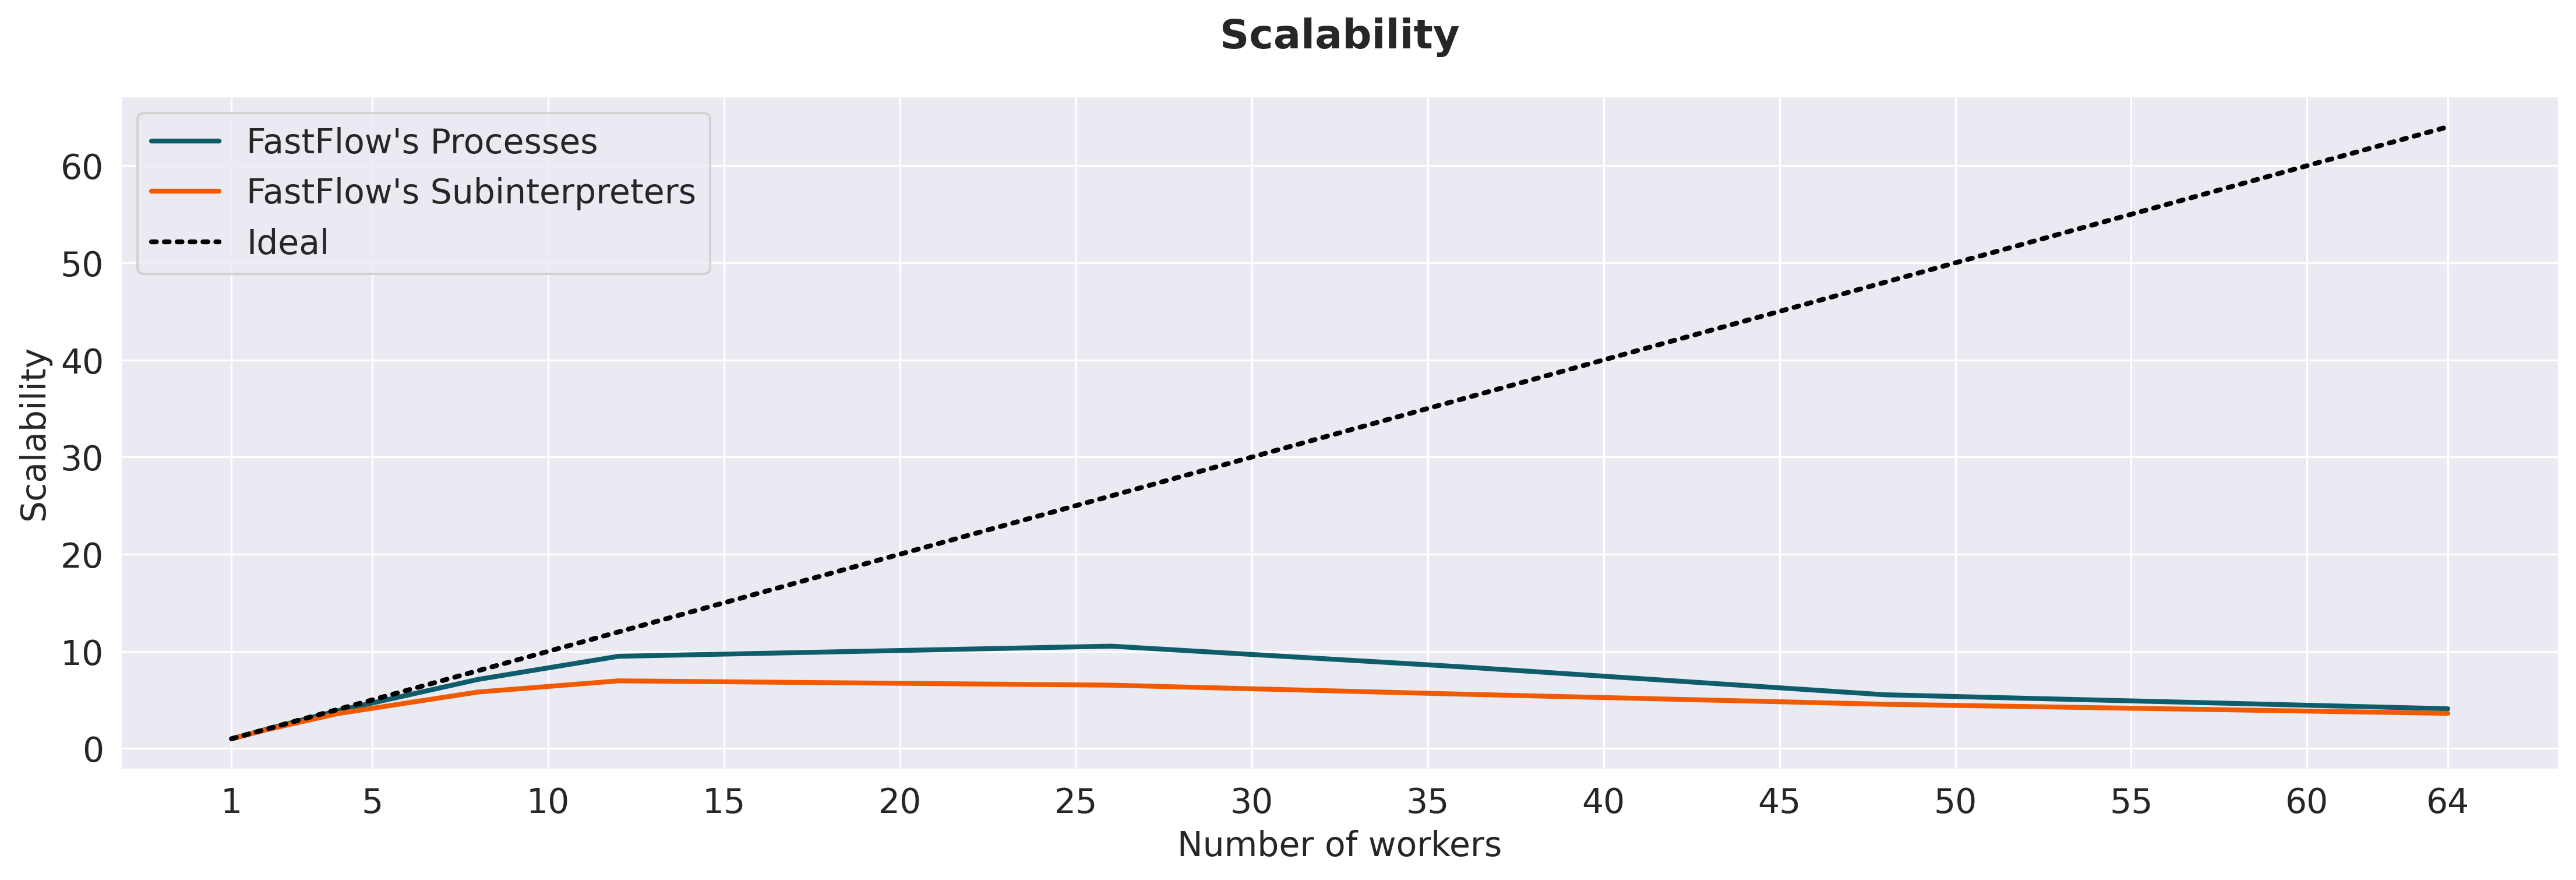

In [8]:
plot_scalability(ms1_processes, ms1_subinterpreters)

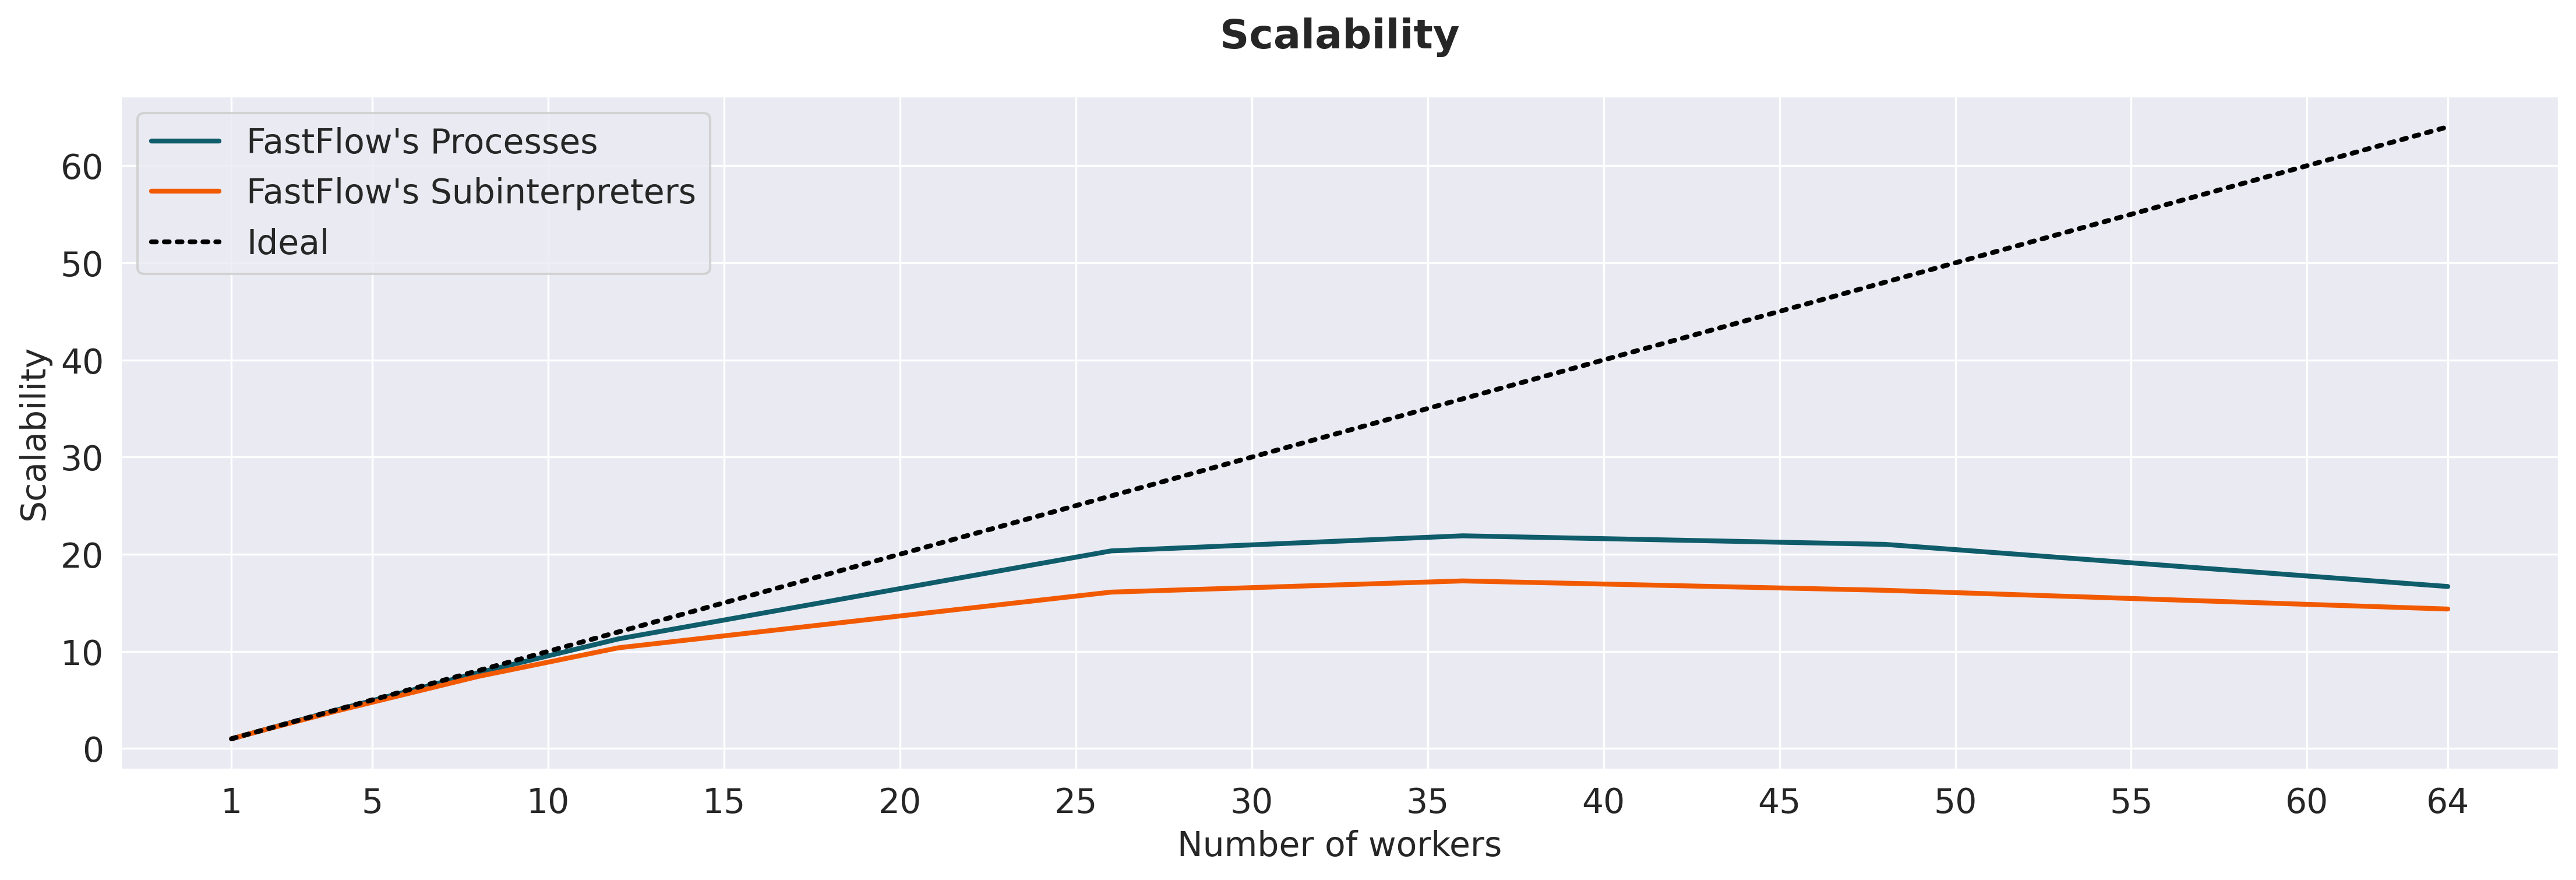

In [9]:
plot_scalability(ms5_processes, ms5_subinterpreters)

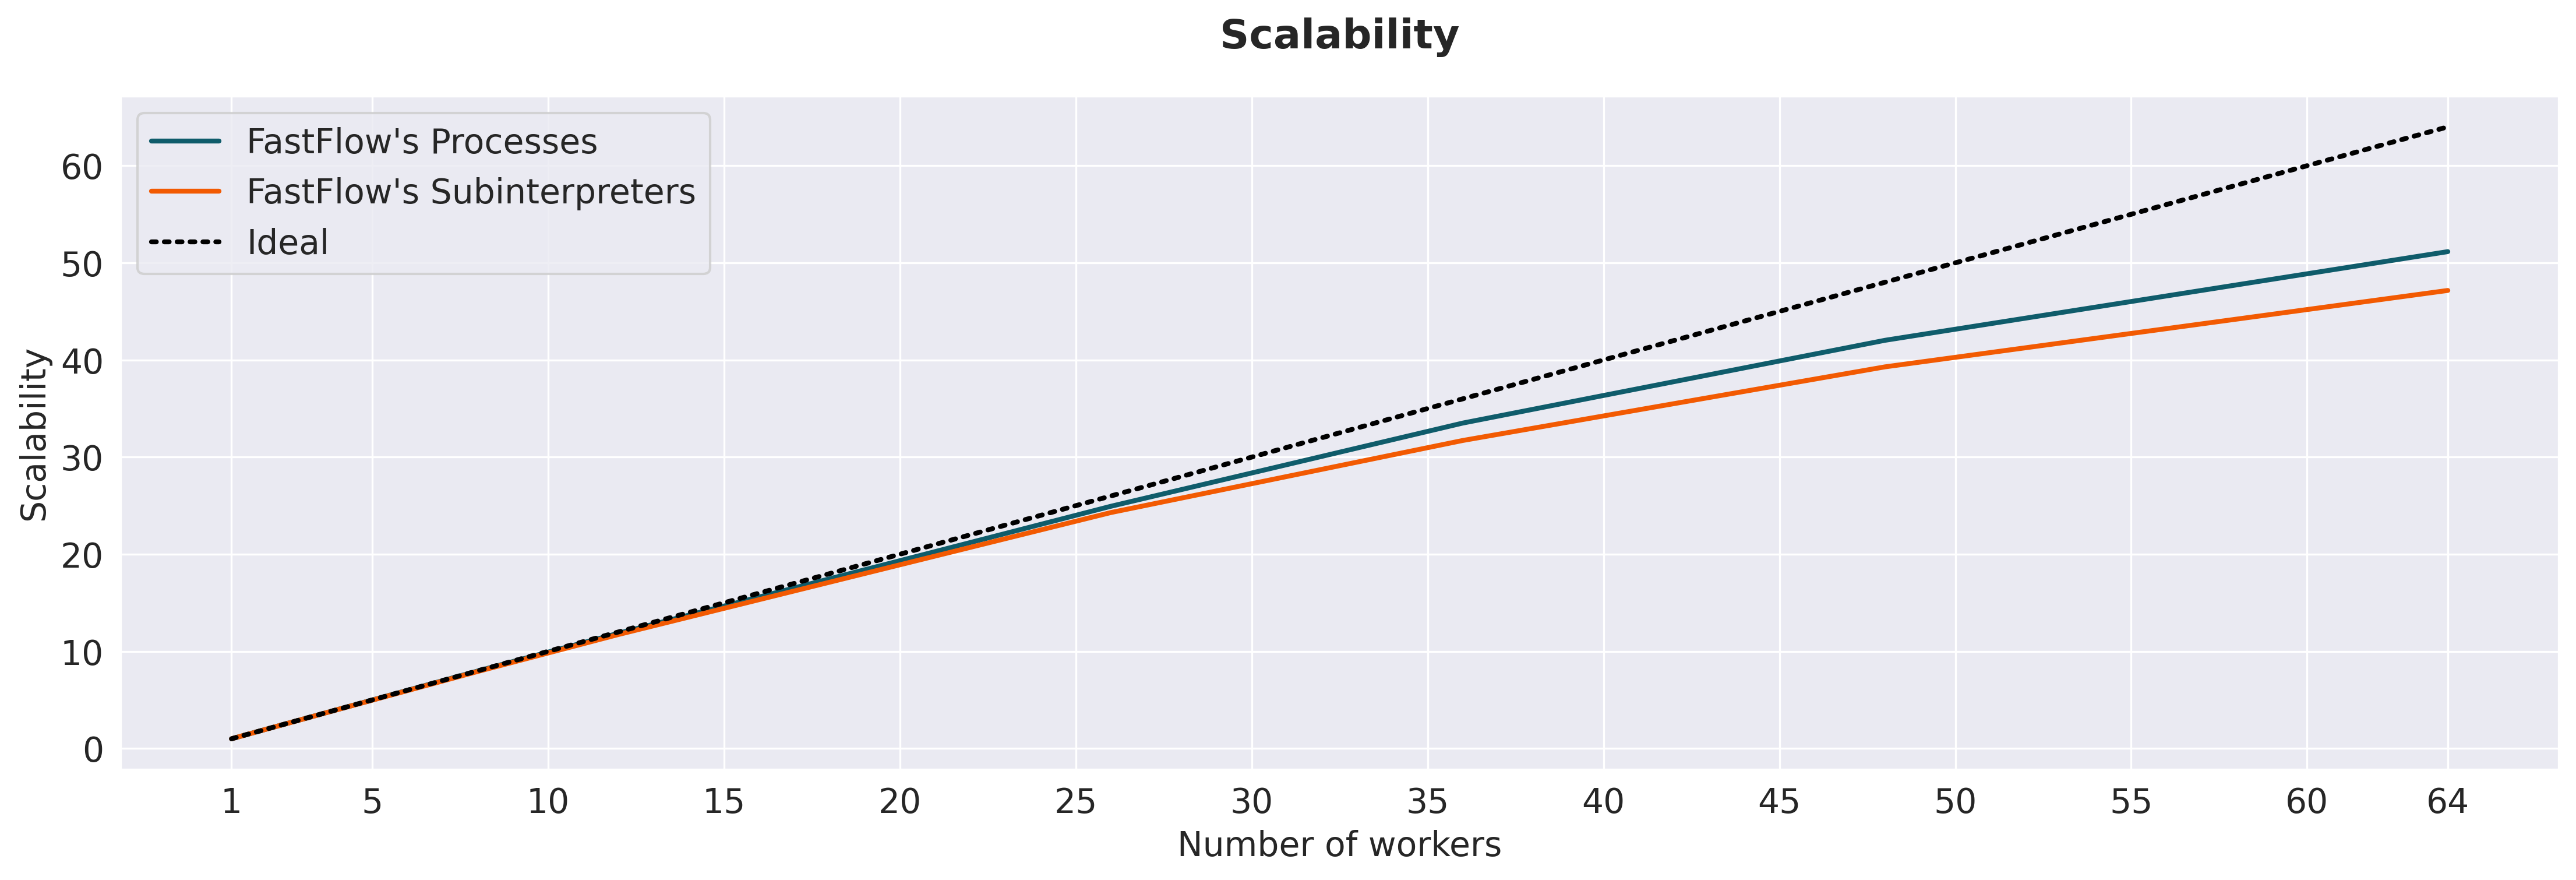

In [10]:
plot_scalability(ms50_processes, ms50_subinterpreters)